In [199]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [161]:
def load_file(filename):
    return np.loadtxt(filename)

In [200]:
def extract_scores_labels(file):
    scores = file[: , : 3]
    predictdLabels = file[:, 3].reshape(file.shape[0], 1)
    actualLabels = file[:, 4].reshape(file.shape[0], 1)
    return (scores, predictdLabels, actualLabels)

In [201]:
def min_max_normalize(X):
    return (X-min(X))/(max(X)-min(X))

def mean_var_normalize(X):
    return (X-np.mean(X))/np.var(X)

In [202]:
def do_normalization(scores):
    normalized_scores = scores
    for i in range(scores.shape[1]):
        normalized_scores[:, i] = min_max_normalize(scores[:, i])
    return normalized_scores

In [203]:
# ROC Curve

def roc(no_of_test_points, no_of_classes, actualValues, score ):

    #no_of_test_points = test_data.shape[0]
    #no_of_classes = 3
    
    TPR = []
    FPR = []
    FNR = []
    t = []

    for threshold in np.arange(0, 1, 0.0001):
        t.append(threshold)
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for i in range(0, no_of_test_points):
            for j in range(0, no_of_classes):
                if actualValues[i] == j+1:
                    if score[i][j] >= threshold:  
                        TP = TP+1
                    elif score[i][j] < threshold:
                        FN = FN+1
                else:
                    if score[i][j] >= threshold:
                        FP = FP+1
                    elif score[i][j] < threshold:
                        TN = TN+1
        tpr = TP / (TP + FN)  
        fpr = FP / (FP + TN)
        fnr = FN / (TP + FN)
        TPR.append(tpr)
        FPR.append(fpr)
        FNR.append(fnr)
        #roc_auc.append(auc(fpr, tpr))
    return (FPR, TPR, FNR)


    
#def rocPlot(FPR1, TPR1, FPR2, TPR2, FPR3, TPR3, FPR4, TPR4, FPR5, TPR5, FPR6, TPR6):
def rocPlot(FPR1, TPR1, FPR2, TPR2, FPR3, TPR3, FPR4, TPR4):
    plt.figure()
    lw = 2 #linewidth
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.plot(FPR1, TPR1, color='darkorange', lw=lw, label='K = 16 states = 6')
    plt.plot(FPR2, TPR2, color='blue', lw=lw, label='K = 16 states = 4')
    plt.plot(FPR3, TPR3, color='cyan', lw=lw, label='K = 10 states = 6')
    plt.plot(FPR4, TPR4, color='red', lw=lw, label='K = 10 states = 4')
    #plt.plot(FPR5, TPR5, color='black', lw=lw, label='K = 6 states = 6')
    #plt.plot(FPR6, TPR6, color='yellow', lw=lw, label='K = 6 states = 4')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.00])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc="lower right")
    plt.title('ROC Curve Isolated Digits')
    plt.show()
    
    
from matplotlib import pyplot as plt
import matplotlib
#def DETCurve(fps,fns):
#def DETCurve(FPR1, FNR1, FPR2, FNR2, FPR3, FNR3, FPR4, FNR4, FPR5, FNR5, FPR6, FNR6):
def DETCurve(FPR1, FNR1, FPR2, FNR2, FPR3, FNR3, FPR4, FNR4):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    lw = 2 #linewidth
    axis_min = min(FPR1[0],FNR1[-1])
    fig,ax = plt.subplots()
    
    plt.plot(FNR1, FPR1, color='darkorange', lw=lw, label='K = 16 states = 6')
    plt.plot(FPR2, FNR2, color='blue', lw=lw, label='K = 16 states = 4')
    plt.plot(FPR3, FNR3, color='cyan', lw=lw, label='K = 10 states = 6')
    plt.plot(FPR4, FNR4, color='red', lw=lw, label='K = 10 states = 4')
    #plt.plot(FPR5, FNR5, color='black', lw=lw, label='K = 6 states = 6')
    #plt.plot(FPR6, FNR6, color='yellow', lw=lw, label='K = 6 states = 4')
    
    plt.yscale('log')
    plt.xscale('log')
    #ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
    ticks_to_use = [0.01,0.02,0.05,0.1,0.2,0.5,1,2]
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    #plt.axis([0.01,80,0.01,50])
    plt.axis([0.01,10,0.01,10])
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.grid()
    plt.legend(loc="upper right")
    plt.title('DET for Isolated Digits')
    plt.show()

In [204]:
file1 = load_file('./16_6')
file2 = load_file('./16_4')
file3 = load_file('./10_6')
file4 = load_file('./10_4')
#file5 = load_file('./6_4')
#file6 = load_file('./6_6')

In [205]:
(scores1, prdictedLabels1, actualLabels1) = extract_scores_labels(file1)
(scores2, prdictedLabels2, actualLabels2) = extract_scores_labels(file2)
(scores3, prdictedLabels3, actualLabels3) = extract_scores_labels(file3)
(scores4, prdictedLabels4, actualLabels4) = extract_scores_labels(file4)
#(scores5, prdictedLabels5, actualLabels5) = extract_scores_labels(file5)
#(scores6, prdictedLabels6, actualLabels6) = extract_scores_labels(file6)

In [206]:
normalized_scores1 = do_normalization(scores1)
normalized_scores2 = do_normalization(scores2)
normalized_scores3 = do_normalization(scores3)
normalized_scores4 = do_normalization(scores4)
normalized_scores5 = do_normalization(scores5)
#normalized_scores6 = do_normalization(scores6)

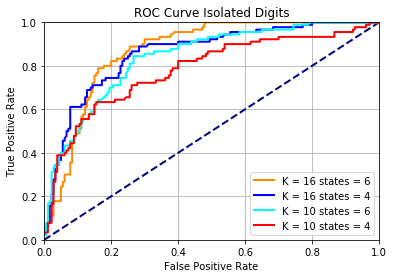

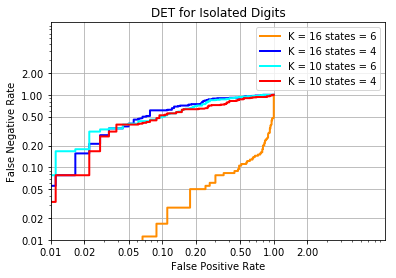

In [207]:
# roc(no_of_test_points, no_of_classes, actualValues, score )
(fpr1, tpr1, fnr1) = roc(scores1.shape[0], 3, actualLabels1, normalized_scores1 )
(fpr2, tpr2, fnr2) = roc(scores2.shape[0], 3, actualLabels2, normalized_scores2 )
(fpr3, tpr3, fnr3) = roc(scores3.shape[0], 3, actualLabels3, normalized_scores3 )
(fpr4, tpr4, fnr4) = roc(scores4.shape[0], 3, actualLabels4, normalized_scores4 )
#(fpr5, tpr5, fnr5) = roc(scores5.shape[0], 3, actualLabels5, normalized_scores5 )
#(fpr6, tpr6, fnr6) = roc(scores6.shape[0], 3, actualLabels6, normalized_scores6 )

#rocPlot(fpr1, tpr1, fpr2, tpr2, fpr3, tpr3, fpr4, tpr4, fpr5, tpr5, fpr6, tpr6)
rocPlot(fpr1, tpr1, fpr2, tpr2, fpr3, tpr3, fpr4, tpr4)

DETCurve(fpr1, tpr1, fpr2, tpr2, fpr3, tpr3, fpr4, tpr4)

In [208]:
# no_of_models = 3
def get_target_nonTarget(scores):
    s = scores
    target = []
    non_target = []
    for i in range(s.shape[0]):
        if s[i][0] > s[i][1] and s[i][0] > s[i][2] :
            target.append(s[i][0])
            non_target.append(s[i][1])
            non_target.append(s[i][2])

        elif s[i][1] > s[i][0] and s[i][1] > s[i][2] :
            target.append(s[i][1])
            non_target.append(s[i][0])
            non_target.append(s[i][2])

        else:
            target.append(s[i][2])
            non_target.append(s[i][1])
            non_target.append(s[i][0])
    return (target, non_target)

In [209]:
(tar1, non_tar1) = get_target_nonTarget(scores1)
(tar2, non_tar2) = get_target_nonTarget(scores2)
(tar3, non_tar3) = get_target_nonTarget(scores3)

In [226]:
def store_in_file(X):
    a = np.asarray(X).reshape(1, len(X))
    #filename = 'target1.csv'
    filename = 'nontarget1.csv'
    a.tofile(filename, sep=' ',format='%2.10f')

In [227]:
store_in_file(non_tar1)